In [2]:
# Libraries for data manipulation
import pandas as pd
import numpy as np
import math

# Libraries for visualization, including Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting as pd_plotting

# Libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Libraries for building and training neural networks
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Library for saving and loading machine learning models
import joblib


In [3]:
# 1. Load the Data
eth_data = pd.read_csv('ETH_historical_data.csv')
print(eth_data.tail())

                           Date         Open         High          Low  \
1310  2023-08-03 00:00:00+00:00  1838.897949  1856.407593  1825.347778   
1311  2023-08-04 00:00:00+00:00  1834.890503  1847.912231  1817.413818   
1312  2023-08-05 00:00:00+00:00  1827.798584  1836.464844  1824.807983   
1313  2023-08-06 00:00:00+00:00  1834.845215  1836.248901  1824.986694   
1314  2023-08-07 00:00:00+00:00  1827.239502  1842.522583  1804.716675   

            Close      Volume  Dividends  Stock Splits  
1310  1835.136475  4710581074        0.0           0.0  
1311  1827.712891  4861242484        0.0           0.0  
1312  1834.987915  2866049749        0.0           0.0  
1313  1827.462036  2963395076        0.0           0.0  
1314  1826.938843  5837881974        0.0           0.0  


In [4]:
# Checking the shape of the data
eth_data.shape

(1315, 8)

In [5]:
# Describing the data to get statistical summary
eth_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1315.000000,1315.000000,1315.000000,1315.000000,1.315000e+03,1315.0,1315.0
mean,1699.211286,1749.036682,1644.025674,1700.227725,1.703999e+10,0.0,0.0
std,1165.046207,1199.511592,1124.662230,1163.668111,1.034085e+10,0.0,0.0
min,110.406784,116.021622,95.184303,110.605873,2.399675e+09,0.0,0.0
25%,541.921570,566.858063,511.321289,547.641998,9.849343e+09,0.0,0.0
50%,1657.336548,1699.911743,1613.416016,1658.036377,1.503136e+10,0.0,0.0
75%,2417.857056,2536.772949,2303.171021,2421.453735,2.105247e+10,0.0,0.0
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10,0.0,0.0


In [6]:
# Getting the info of the data
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1315 non-null   object 
 1   Open          1315 non-null   float64
 2   High          1315 non-null   float64
 3   Low           1315 non-null   float64
 4   Close         1315 non-null   float64
 5   Volume        1315 non-null   int64  
 6   Dividends     1315 non-null   float64
 7   Stock Splits  1315 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 82.3+ KB


In [7]:
# Convert the "Date" column to a datetime format
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# Remove the time zone information (if any)
eth_data['Date'] = eth_data['Date'].dt.tz_localize(None)

# Checking the data types to confirm the conversion
eth_data.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [8]:
# Checking for missing values in the dataset
missing_values = eth_data.isnull().sum()
missing_values

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# Removing the "Dividends" and "Stock Splits" columns
eth_data_cleaned = eth_data.drop(columns=['Dividends', 'Stock Splits'])

# Checking the shape of the data after dropping 
eth_data_cleaned.shape

(1315, 6)

In [10]:
# Displaying the first few rows of the cleaned dataset
eth_data_cleaned.head() 

,Date,Open,High,Low,Close,Volume
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,7935230330
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,8032709256
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,10476845358
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,7430904515
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,7526675353


Lag Plot:-This plot helps you identify any autocorrelation in the time series data the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive linear relationship

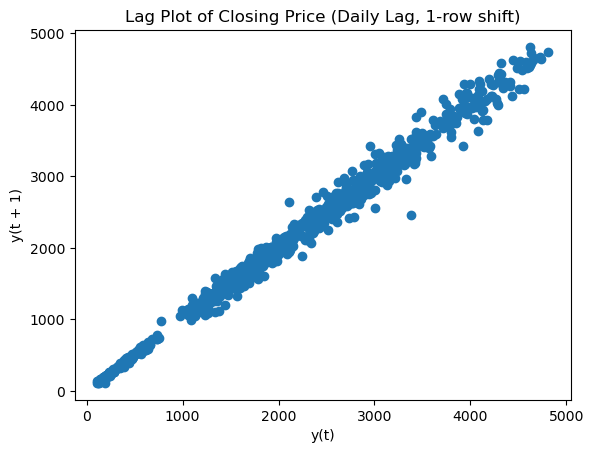

In [11]:
# Drawing the lag plot for the closing price with a daily lag (1-row shift)
pd_plotting.lag_plot(eth_data_cleaned['Close'], lag=1)
plt.title('Lag Plot of Closing Price (Daily Lag, 1-row shift)')
plt.show()

Time Series Plot: plotted the closing price against the date, which is an essential visualization to understand the trend, seasonality, and any anomalies in the data

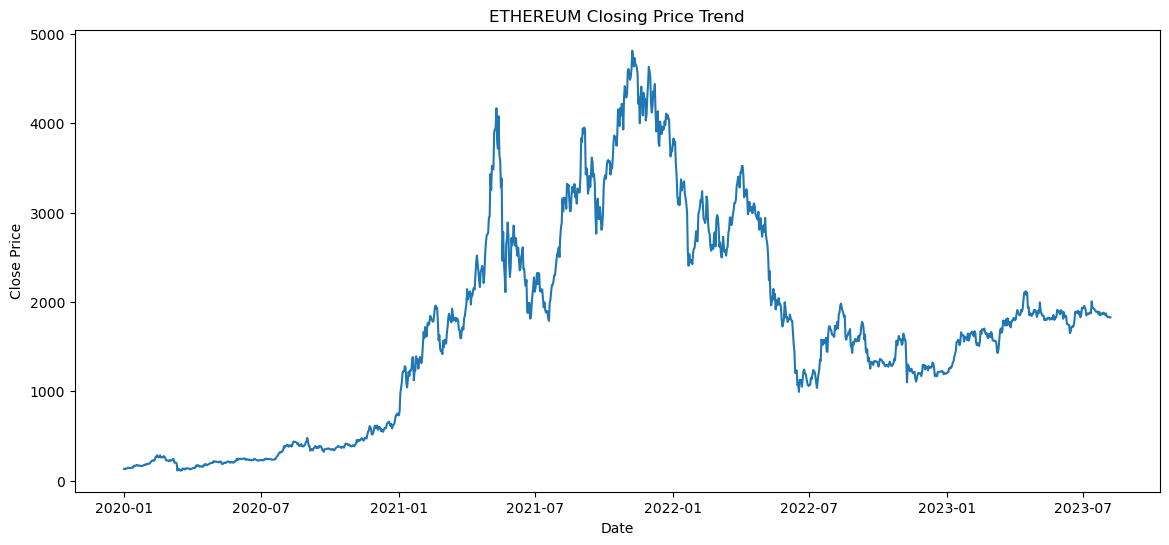

In [12]:
# Plotting the ETHEREUM closing price trend over time
plt.figure(figsize=(14,6))
plt.plot(eth_data_cleaned['Date'], eth_data_cleaned['Close'])
plt.title('ETHEREUM Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


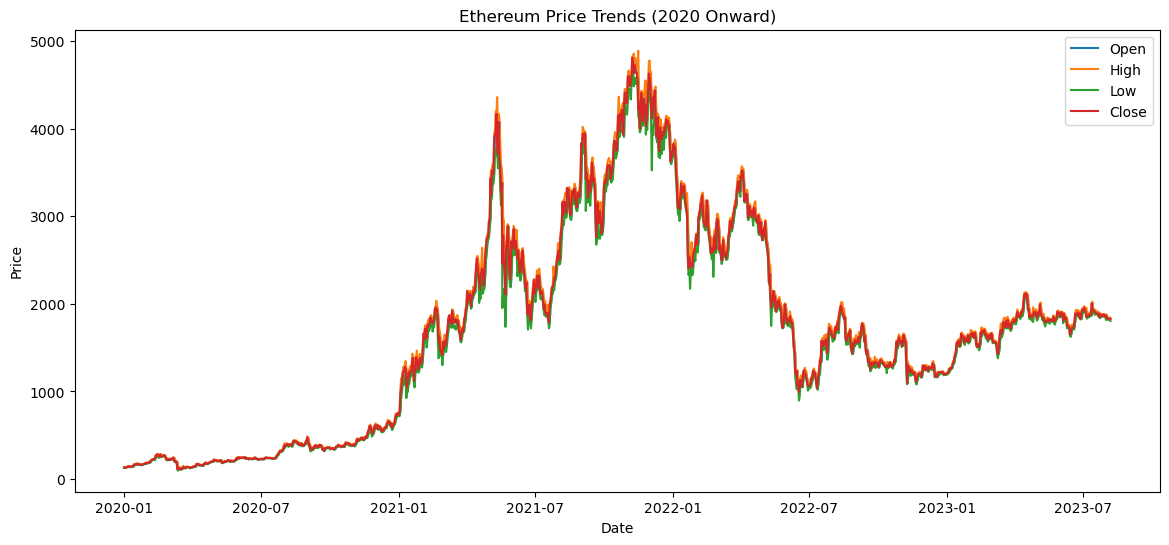

In [13]:
# Plotting the 'Open', 'High', 'Low', and 'Close' features on the same graph 

plt.figure(figsize=(14,6))
for feature in ['Open', 'High', 'Low', 'Close']:
    plt.plot(eth_data_cleaned['Date'], eth_data_cleaned[feature], label=feature)

plt.title('Ethereum Price Trends (2020 Onward)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


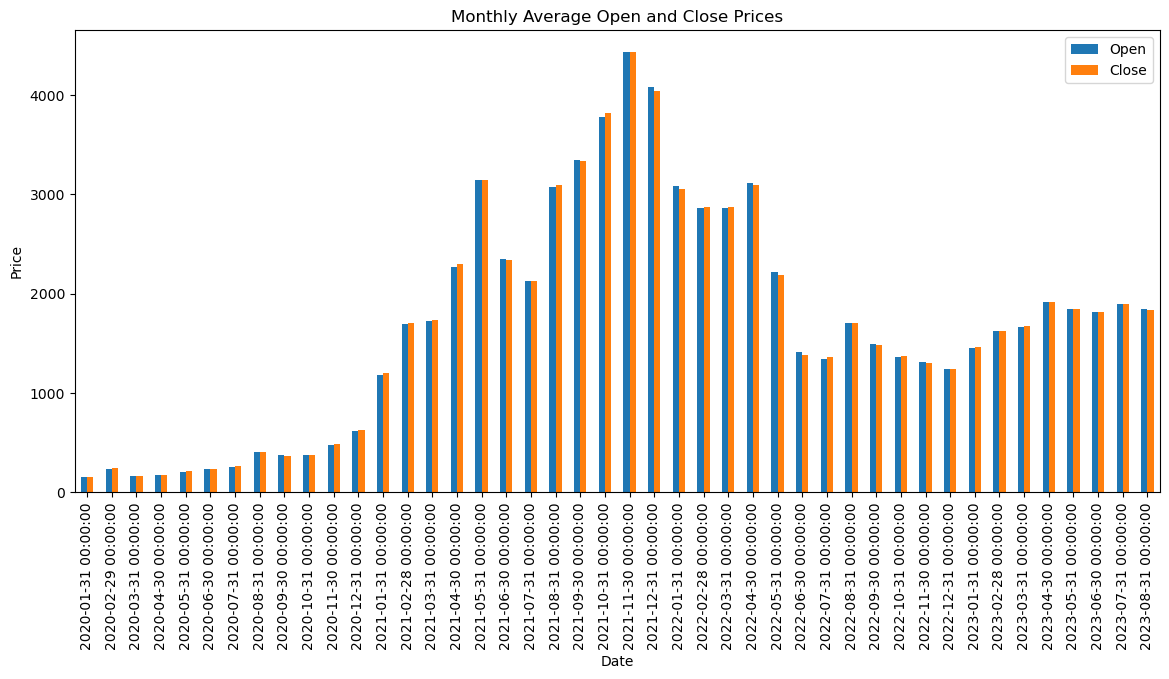

In [14]:
# Resampling the data by month and calculating the mean for the 'Open' and 'Close' prices
monthly_average_data = eth_data_cleaned.resample('M', on='Date')[['Open', 'Close']].mean()

# Plotting the monthly average 'Open' and 'Close' prices in a bar chart
monthly_average_data.plot(kind='bar', figsize=(14,6))
plt.title('Monthly Average Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Boxplot: The boxplot helps you understand the distribution of the closing prices, including the median, quartiles, and potential outliers.

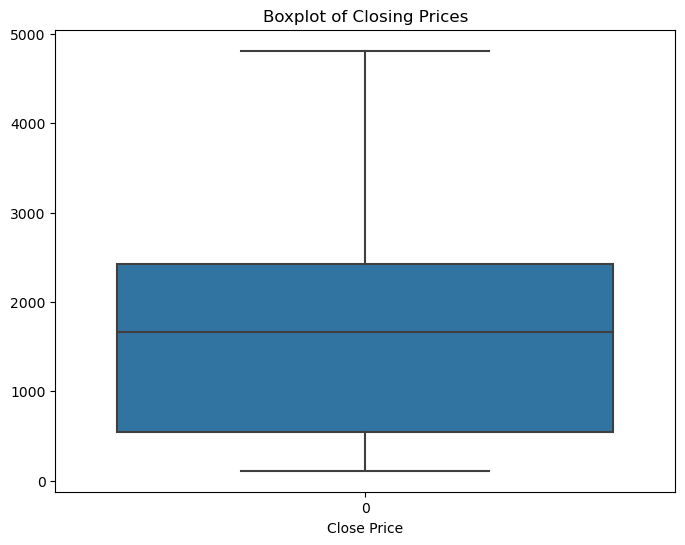

In [12]:
# Plotting a boxplot of ETHEREUM's closing prices to visualize distribution and outliers
plt.figure(figsize=(8,6))
sns.boxplot(eth_data_cleaned['Close'])
plt.title('Boxplot of Closing Prices')
plt.xlabel('Close Price')
plt.show()


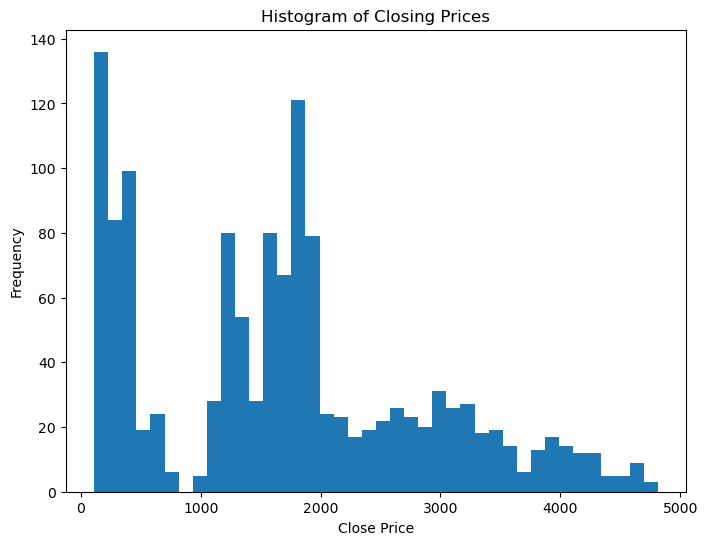

In [13]:
# Plotting a histogram of ETHEREUM's closing prices to understand the frequency distribution
plt.figure(figsize=(8,6))
plt.hist(eth_data_cleaned['Close'], bins=40)
plt.title('Histogram of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


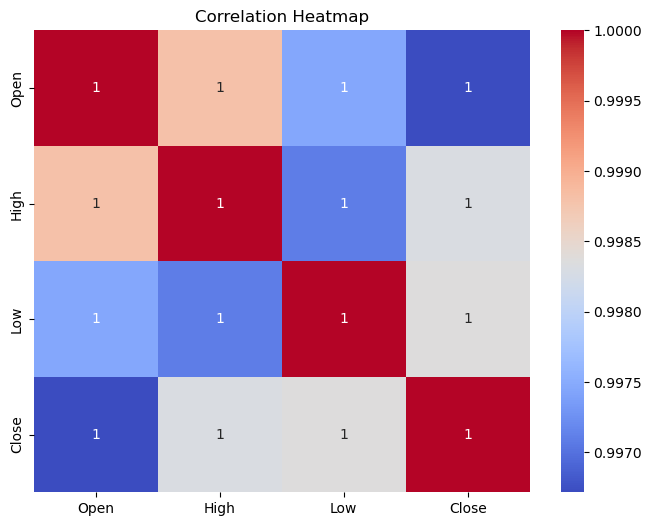

In [14]:
# Creating a correlation heatmap to visualize the relationships between 'Open', 'High', 'Low', and 'Close' attributes
correlation_matrix = eth_data_cleaned[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


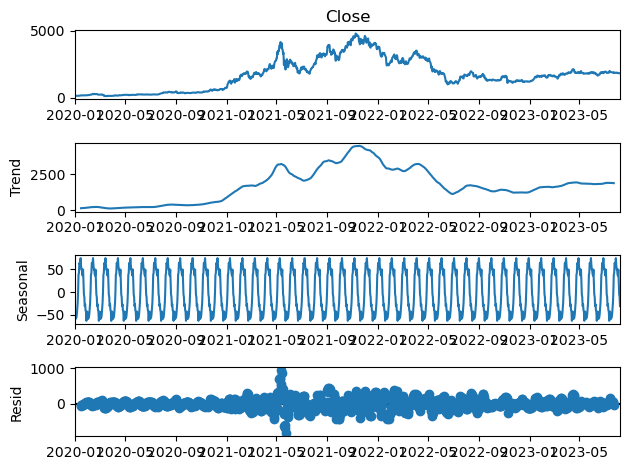

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the Date as the index, performing seasonal decomposition on the 'Close' attribute, and plotting the components

# Set the Date as the index
eth_data_cleaned.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(eth_data_cleaned['Close'], period=30) # we can change the period

# Plot the components
decomposition.plot()
plt.show()


In [16]:
# Grouping the data by 'Date'
group = eth_data_cleaned.groupby('Date')

# Calculating the mean of the 'Close' column for each date
eth_closing_price_groupby_date = group['Close'].mean()

# Displaying the first 10 rows of the grouped data
display(eth_closing_price_groupby_date.head(10))

# Printing the length of the grouped data
print("Length of eth_closing_price_groupby_date :", len(eth_closing_price_groupby_date))


Date
2020-01-01    130.802002
2020-01-02    127.410179
2020-01-03    134.171707
2020-01-04    135.069366
2020-01-05    136.276779
2020-01-06    144.304153
2020-01-07    143.543991
2020-01-08    141.258133
2020-01-09    138.979202
2020-01-10    143.963776
Name: Close, dtype: float64

Length of eth_closing_price_groupby_date : 1315


In [17]:
# Setting the prediction days
prediction_days = 500

# Set Train data to be up to (Total data length - prediction_days)
df_train = eth_closing_price_groupby_date[:len(eth_closing_price_groupby_date) - prediction_days].values.reshape(-1, 1)

# Set Test data to be the last prediction_days (or 60 days in this case)
df_test = eth_closing_price_groupby_date[len(eth_closing_price_groupby_date) - prediction_days:].values.reshape(-1, 1)

df_train.shape, df_test.shape



((815, 1), (500, 1))

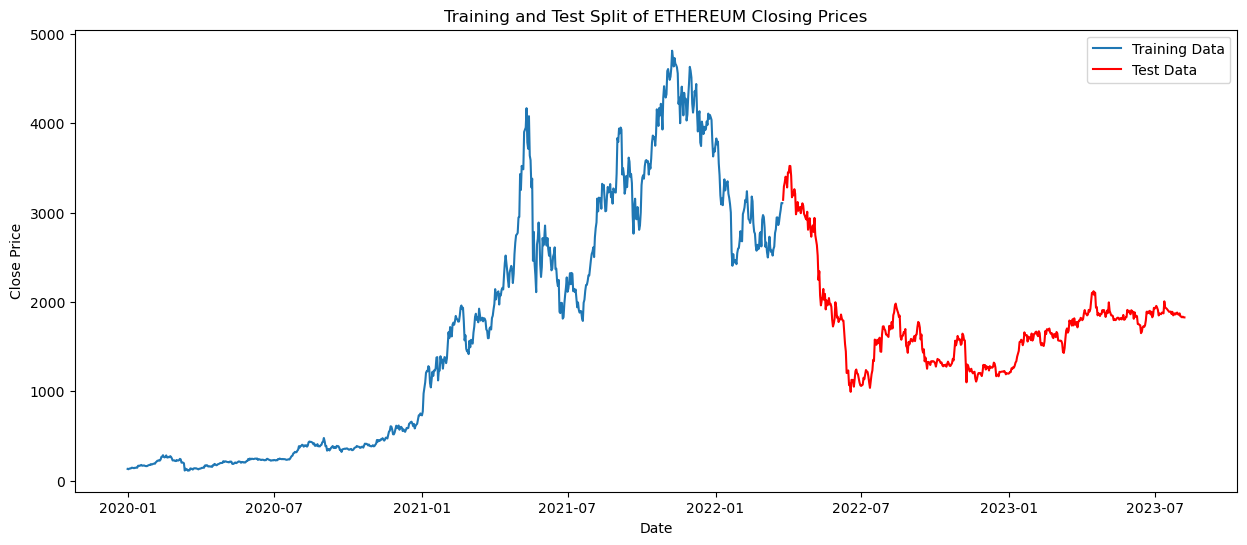

In [18]:
# Create a figure and set the size of the plot
plt.figure(figsize=(15, 6))

# Plot the training data (all data except the last 60 days) using the 'Close' price
# The blue line represents the training data, which includes the historical closing prices up to 60 days before the end of the dataset
plt.plot(eth_closing_price_groupby_date.index[:len(eth_closing_price_groupby_date) - prediction_days], df_train, label='Training Data')

# Plot the test data (the last 60 days) using the 'Close' price
# The red line represents the test data, which includes the closing prices for the last 60 days of the dataset
plt.plot(eth_closing_price_groupby_date.index[len(eth_closing_price_groupby_date) - prediction_days:], df_test, label='Test Data', color='red')

# Add a title to the plot, describing the content
plt.title('Training and Test Split of ETHEREUM Closing Prices')

# Label the x-axis as 'Date'
plt.xlabel('Date')

# Label the y-axis as 'Close Price'
plt.ylabel('Close Price')

# Add a legend to the plot to differentiate between the training and test data
plt.legend()

# Display the plot
plt.show()


In [19]:
# Scaling the training data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(df_train)

# Scaling the test data using the same scaler fit on the training data
scaled_test = scaler.transform(df_test)

# Shapes of the scaled training and test data
scaled_train.shape, scaled_test.shape

((815, 1), (500, 1))

In [20]:
# Defining the look_back value
# This value determines how many previous timesteps are used to predict the next value in the sequence
look_back = 10

# Function to generate input-output pairs for an LSTM dataset
def dataset_generator_lstm(dataset, look_back=look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        # Extracting the window of 'look_back' previous timesteps for input
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        # Extracting the next timestep value as the corresponding output
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Generating the sequences for training data using scaled_train (scaled closing prices for training)
trainX, trainY = dataset_generator_lstm(scaled_train)

# Generating the sequences for test data using scaled_test (scaled closing prices for testing)
testX, testY = dataset_generator_lstm(scaled_test)

# Printing the shapes of the generated sequences
# These shapes represent the number of sequences and the length of each sequence for both training and test data
print("Shape of trainX:", trainX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testX:", testX.shape)
print("Shape of testY:", testY.shape)



Shape of trainX: (805, 10)
Shape of trainY: (805,)
Shape of testX: (490, 10)
Shape of testY: (490,)


In [21]:
# Printing the first 5 sequences for training and test input and output data

print("First 5 sequences of trainX:\n", trainX[:5])
print("\nFirst 5 corresponding values of trainY:\n", trainY[:5])
print("\nFirst 5 sequences of testX:\n", testX[:5])
print("\nFirst 5 corresponding values of testY:\n", testY[:5])

First 5 sequences of trainX:
 [[0.00429569 0.00357426 0.00501243 0.00520336 0.00546017 0.00716759
  0.0070059  0.0065197  0.00603498 0.00709519]
 [0.00357426 0.00501243 0.00520336 0.00546017 0.00716759 0.0070059
  0.0065197  0.00603498 0.00709519 0.00687469]
 [0.00501243 0.00520336 0.00546017 0.00716759 0.0070059  0.0065197
  0.00603498 0.00709519 0.00687469 0.00750148]
 [0.00520336 0.00546017 0.00716759 0.0070059  0.0065197  0.00603498
  0.00709519 0.00687469 0.00750148 0.00715109]
 [0.00546017 0.00716759 0.0070059  0.0065197  0.00603498 0.00709519
  0.00687469 0.00750148 0.00715109 0.01177277]]

First 5 corresponding values of trainY:
 [0.00687469 0.00750148 0.00715109 0.01177277 0.01183134]

First 5 sequences of testX:
 [[0.64502499 0.67658923 0.68617278 0.70007335 0.69649366 0.6744761
  0.71019026 0.70923462 0.7257771  0.72543842]
 [0.67658923 0.68617278 0.70007335 0.69649366 0.6744761  0.71019026
  0.70923462 0.7257771  0.72543842 0.7021588 ]
 [0.68617278 0.70007335 0.69649366 0.6

In [22]:
# Reshaping the input data to be a 3D tensor (samples, time steps, features)
# LSTM models require input data in this shape, where 'samples' is the number of input sequences,
# 'time steps' is the length of each sequence (in this case, defined by 'look_back'), and 'features' is the number of features at each timestep (1 in this case)

# Reshaping the training input data (trainX) to have the required 3D shape
trainX_reshaped = trainX.reshape(trainX.shape[0], look_back, 1)

# Reshaping the test input data (testX) to have the required 3D shape
testX_reshaped = testX.reshape(testX.shape[0], look_back, 1)

# Printing the shapes of the reshaped data
# These shapes confirm that the data is now in the required 3D format, suitable for training an LSTM model
print("Shape of trainX_reshaped:", trainX_reshaped.shape)
print("Shape of testX_reshaped:", testX_reshaped.shape)



Shape of trainX_reshaped: (805, 10, 1)
Shape of testX_reshaped: (490, 10, 1)


In [23]:
# Printing the first 5 sequences of both the reshaped training and testing data
print("First 5 sequences of trainX_reshaped:\n", trainX_reshaped[:5])
print(" ********** ")
print("First 5 sequences of testX_reshaped:\n", testX_reshaped[:5])


First 5 sequences of trainX_reshaped:
 [[[0.00429569]
  [0.00357426]
  [0.00501243]
  [0.00520336]
  [0.00546017]
  [0.00716759]
  [0.0070059 ]
  [0.0065197 ]
  [0.00603498]
  [0.00709519]]

 [[0.00357426]
  [0.00501243]
  [0.00520336]
  [0.00546017]
  [0.00716759]
  [0.0070059 ]
  [0.0065197 ]
  [0.00603498]
  [0.00709519]
  [0.00687469]]

 [[0.00501243]
  [0.00520336]
  [0.00546017]
  [0.00716759]
  [0.0070059 ]
  [0.0065197 ]
  [0.00603498]
  [0.00709519]
  [0.00687469]
  [0.00750148]]

 [[0.00520336]
  [0.00546017]
  [0.00716759]
  [0.0070059 ]
  [0.0065197 ]
  [0.00603498]
  [0.00709519]
  [0.00687469]
  [0.00750148]
  [0.00715109]]

 [[0.00546017]
  [0.00716759]
  [0.0070059 ]
  [0.0065197 ]
  [0.00603498]
  [0.00709519]
  [0.00687469]
  [0.00750148]
  [0.00715109]
  [0.01177277]]]
 ********** 
First 5 sequences of testX_reshaped:
 [[[0.64502499]
  [0.67658923]
  [0.68617278]
  [0.70007335]
  [0.69649366]
  [0.6744761 ]
  [0.71019026]
  [0.70923462]
  [0.7257771 ]
  [0.72543842]]

In [24]:
# Checking the values for input_shape (timesteps, n_features) using the reshaped data
timesteps = trainX_reshaped.shape[1]
n_features = trainX_reshaped.shape[2]

print("timesteps in input_shape = (timesteps, n_features):", timesteps)
print("n_features in input_shape = (timesteps, n_features):", n_features)


timesteps in input_shape = (timesteps, n_features): 10
n_features in input_shape = (timesteps, n_features): 1


In [25]:
from tensorflow.keras.optimizers import Adam

def create_model(units, dropout_rate, lookback_period, learning_rate):
    model = Sequential()
    # First LSTM layer with specified units and return_sequences=True for stacking
    model.add(LSTM(units=units, activation='relu', return_sequences=True, input_shape=(lookback_period, 1)))
    # Dropout layer to prevent overfitting
    model.add(Dropout(dropout_rate))
    # Second LSTM layer with half the units
    model.add(LSTM(units=units//2))
    # Dropout layer to prevent overfitting
    model.add(Dropout(dropout_rate))
    # Output Dense layer with 1 unit for regression
    model.add(Dense(units=1))
    # Compiling the model with the Adam optimizer and mean squared error loss function
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error') # Set custom learning rate
    return model

# Parameters for the model
units = 64          # Adjusted number of LSTM units
dropout_rate = 0.2
lookback_period = look_back
learning_rate = 0.001  # Adjusted learning rate


# Creating the model
model = create_model(units, dropout_rate, lookback_period, learning_rate)
# Displaying the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the checkpoint path to save the best model
checkpoint_path = 'my_best_model.hdf5'

# Create a checkpoint callback to save the model with the lowest validation loss
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

# Create an early stopping callback to stop training if validation loss doesn't improve for 20 epochs
earlystopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# List of callbacks
callbacks = [checkpoint, earlystopping]

# Fit the model with training data, validation data, and callbacks
# Using the reshaped training and test data for training and validation
history = model.fit(trainX_reshaped, trainY, batch_size=32, epochs=200, verbose=1, shuffle=False, validation_data=(testX_reshaped, testY), callbacks=callbacks)


Epoch 1/200
22/26 [========================>.....] - ETA: 0s - loss: 0.0137   
Epoch 1: val_loss improved from inf to 0.02116, saving model to my_best_model.hdf5
26/26 [==============================] - 5s 54ms/step - loss: 0.0169 - val_loss: 0.0212
Epoch 2/200
25/26 [===========================>..] - ETA: 0s - loss: 0.0334
Epoch 2: val_loss improved from 0.02116 to 0.01167, saving model to my_best_model.hdf5
26/26 [==============================] - 0s 18ms/step - loss: 0.0332 - val_loss: 0.0117
Epoch 3/200
26/26 [==============================] - ETA: 0s - loss: 0.0135
Epoch 3: val_loss improved from 0.01167 to 0.00768, saving model to my_best_model.hdf5
26/26 [==============================] - 0s 16ms/step - loss: 0.0135 - val_loss: 0.0077
Epoch 4/200
22/26 [========================>.....] - ETA: 0s - loss: 0.0088
Epoch 4: val_loss did not improve from 0.00768
26/26 [==============================] - 0s 18ms/step - loss: 0.0093 - val_loss: 0.0081
Epoch 5/200
23/26 [==================

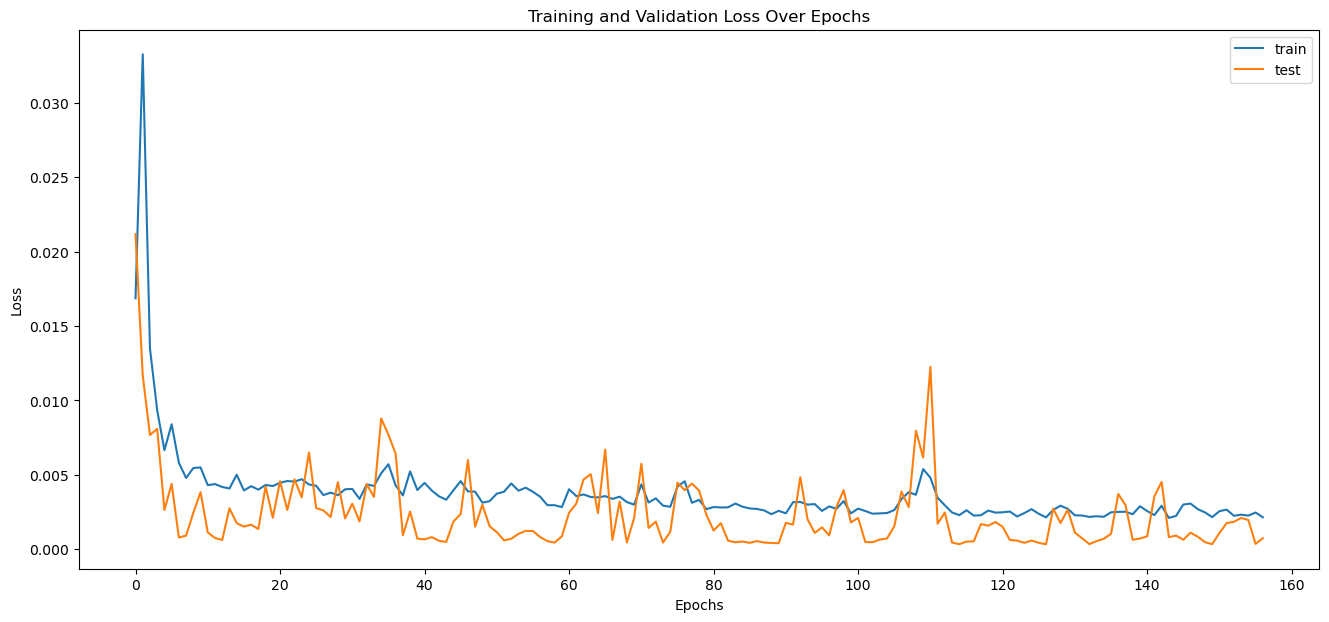

In [27]:
from tensorflow.keras.models import load_model

# Load the best model saved during training from the checkpoint file
# This model was saved using the ModelCheckpoint callback during training
model_from_saved_checkpoint = load_model(checkpoint_path)  # Using the variable defined earlier

# Plot the training and validation loss
# The 'loss' and 'val_loss' values are stored in the 'history' object returned by the 'fit' method
plt.figure(figsize=(16, 7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()



In [28]:
# Making predictions on the test data using the trained model
predicted_eth_price_test_data = model.predict(testX_reshaped)

# Inverse transforming the predictions to bring them back to the original scale
# Using the scaler object that was defined and fit earlier on the training data
predicted_eth_price_test_data = scaler.inverse_transform(predicted_eth_price_test_data)

# Inverse transforming the actual target values of the test data to the original scale
# The testY variable is reshaped to match the required shape for inverse transformation
test_actual = scaler.inverse_transform(testY.reshape(-1, 1))


16/16 [==============================] - 1s 3ms/step


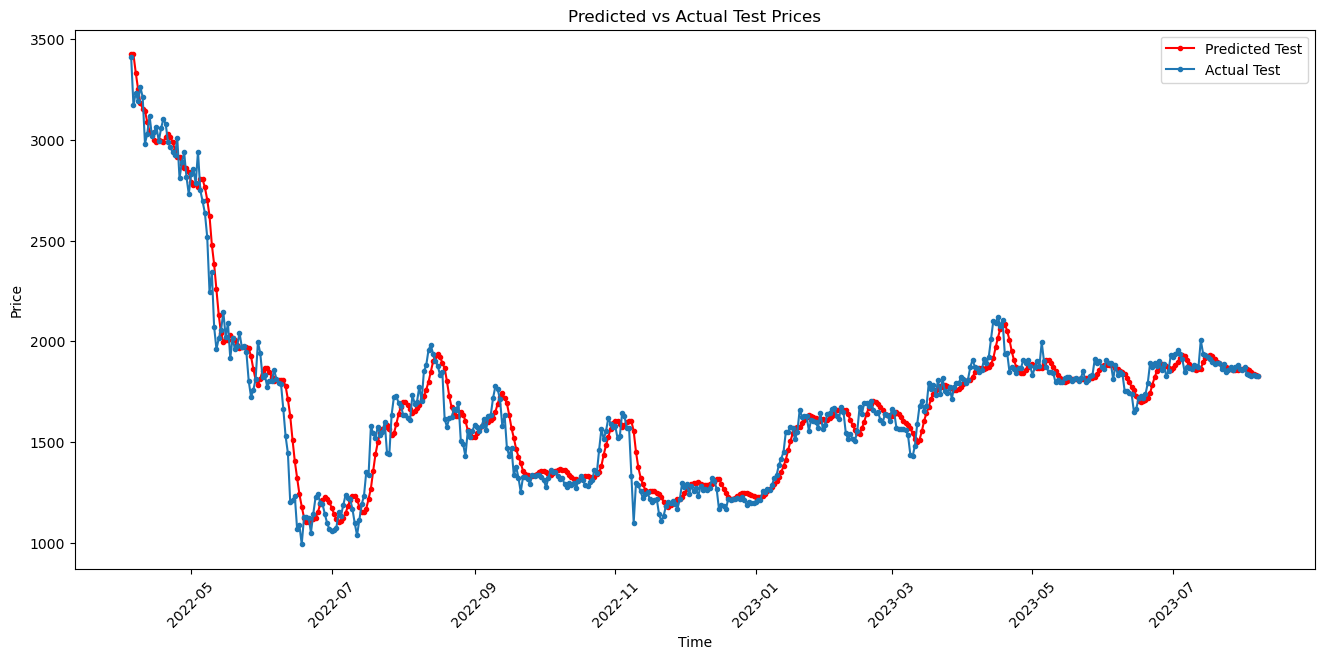

In [29]:
# Extracting the corresponding dates for the test data
test_dates = eth_closing_price_groupby_date.index[-len(test_actual):]

plt.figure(figsize=(16, 7))

# Plotting the predicted Ethereum closing prices for the test data (in red)
plt.plot(test_dates, predicted_eth_price_test_data, 'r', marker='.', label='Predicted Test')

# Plotting the actual Ethereum closing prices for the test data
plt.plot(test_dates, test_actual, marker='.', label='Actual Test')

# Adding labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Price')

# Adding a title to the plot
plt.title('Predicted vs Actual Test Prices')

# Adding a legend to the plot to identify the lines
plt.legend()

# Rotating the x-tick labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


In [30]:
from keras.models import load_model

# Load the best saved model from the checkpoint file
best_model_path = 'my_best_model.hdf5'
model_from_saved_checkpoint = load_model(best_model_path)

# Making predictions on the training data using the best saved model
predicted_eth_price_train_data = model_from_saved_checkpoint.predict(trainX_reshaped)

# Inverse transforming the predictions using the scaler
predicted_eth_price_train_data = scaler.inverse_transform(predicted_eth_price_train_data)

# Inverse transforming the actual target values of the training data using the scaler
train_actual = scaler.inverse_transform(trainY.reshape(-1, 1))


26/26 [==============================] - 1s 4ms/step


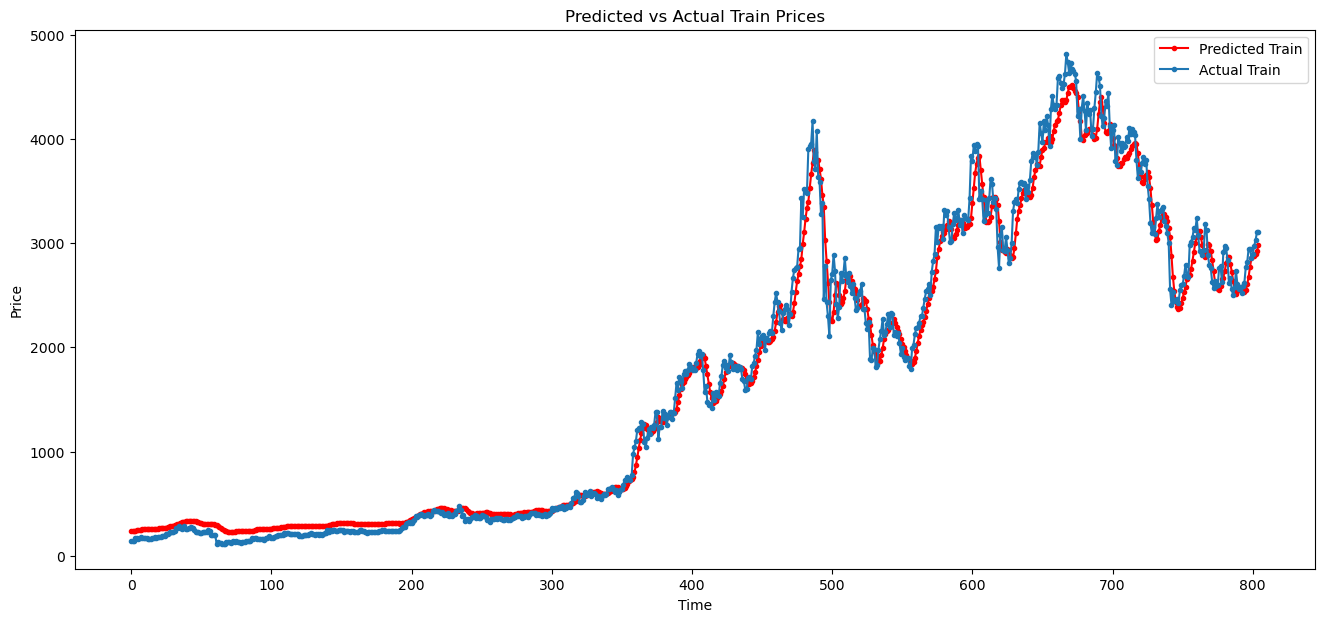

In [31]:
plt.figure(figsize=(16, 7))

# Plotting the predicted Bitcoin closing prices for the training data (in red)
plt.plot(predicted_eth_price_train_data, 'r', marker='.', label='Predicted Train')

# Plotting the actual Bitcoin closing prices for the training data
plt.plot(train_actual, marker='.', label='Actual Train')

# Adding labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Price')

# Adding a title to the plot
plt.title('Predicted vs Actual Train Prices')

# Adding a legend to the plot to identify the lines
plt.legend()

# Displaying the plot
plt.show()


In [32]:
# Calculating RMSE for test data
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_eth_price_test_data))
print('Test RMSE: %.3f' % rmse_lstm_test)

# Calculating RMSE for training data
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_eth_price_train_data))
print('Train RMSE: %.3f' % rmse_lstm_train)


Test RMSE: 87.219
Train RMSE: 153.531


In [33]:
from sklearn.metrics import mean_absolute_error

# Calculating MAE for training data
# Using actual and predicted values for the training data
mae_train = mean_absolute_error(train_actual, predicted_eth_price_train_data)
# Calculating MAE for test data
# Using actual and predicted values for the test data
mae_test = mean_absolute_error(test_actual, predicted_eth_price_test_data)

# Printing the results
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)



Train MAE: 113.39766005995851
Test MAE: 60.00014959841357


In [34]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Calculating the absolute percentage error for each data point
    # Then taking the mean to get the MAPE
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculating MAPE for training data using actual and predicted values
mape_train = mean_absolute_percentage_error(train_actual, predicted_eth_price_train_data)
# Calculating MAPE for test data using actual and predicted values
mape_test = mean_absolute_percentage_error(test_actual, predicted_eth_price_test_data)

# Printing the results
print("Train MAPE:", mape_train, "%")
print("Test MAPE:", mape_test, "%")



Train MAPE: 15.387072043817623 %
Test MAPE: 3.7786874683894833 %


In [35]:
from sklearn.metrics import r2_score

# Calculating R² score for training data using actual and predicted values
r2_train = r2_score(train_actual, predicted_eth_price_train_data)
# Calculating R² score for test data using actual and predicted values
r2_test = r2_score(test_actual, predicted_eth_price_test_data)

# Printing the results
print("Train R²:", r2_train)
print("Test R²:", r2_test)



Train R²: 0.9883639105792883
Test R²: 0.9611247661313116


In [36]:
testX
testX.shape

(490, 10)

In [37]:
look_back = 10  # Based on your context, this is the number of previous days you've used to make predictions

# The last 'look_back' days from testX for future predictions
testX_last_days = testX[-look_back:]

print(testX_last_days.shape)  # This should print (10, )


(10, 10)


In [38]:
testX_last_days

array([[0.37826418, 0.37868132, 0.37891762, 0.37313908, 0.37830326,
        0.36996768, 0.37161394, 0.37468063, 0.3721702 , 0.37523044],
       [0.37868132, 0.37891762, 0.37313908, 0.37830326, 0.36996768,
        0.37161394, 0.37468063, 0.3721702 , 0.37523044, 0.37657555],
       [0.37891762, 0.37313908, 0.37830326, 0.36996768, 0.37161394,
        0.37468063, 0.3721702 , 0.37523044, 0.37657555, 0.37244386],
       [0.37313908, 0.37830326, 0.36996768, 0.37161394, 0.37468063,
        0.3721702 , 0.37523044, 0.37657555, 0.37244386, 0.37127796],
       [0.37830326, 0.36996768, 0.37161394, 0.37468063, 0.3721702 ,
        0.37523044, 0.37657555, 0.37244386, 0.37127796, 0.3746024 ],
       [0.36996768, 0.37161394, 0.37468063, 0.3721702 , 0.37523044,
        0.37657555, 0.37244386, 0.37127796, 0.3746024 , 0.36764663],
       [0.37161394, 0.37468063, 0.3721702 , 0.37523044, 0.37657555,
        0.37244386, 0.37127796, 0.3746024 , 0.36764663, 0.36680578],
       [0.37468063, 0.3721702 , 0.3752304

In [39]:
# Number of future days to forecast
forecast_days = 30

# Get the last 'look_back' days from the testX (reshaped) data
testX_last_days = testX_reshaped[-1]

# Ensure the shape is correct for making predictions
testX_last_days_reshaped = testX_last_days.reshape((1, look_back, 1))

# Predicting the next 'forecast_days' values using the model
predicted_forecast_price = []
for i in range(forecast_days):
    predicted_price = model_from_saved_checkpoint.predict(testX_last_days_reshaped)
    predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))
    predicted_forecast_price.append(predicted_price)
    
    # Update testX_last_days_reshaped by removing the oldest value and appending the predicted value
    testX_last_days_reshaped = np.append(testX_last_days_reshaped[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

print("Forecast for the next", forecast_days, "days beyond the actual trading days:", np.array(predicted_forecast_price))


1/1 [==============================] - 0s 21ms/step
Forecast for the next 30 days beyond the actual trading days: [[[ 1829.3063 ]]

 [[17974.287  ]]

 [[22395.074  ]]

 [[20026.56   ]]

 [[20401.05   ]]

 [[15527.492  ]]

 [[ 5499.823  ]]

 [[ 1516.0618 ]]

 [[  984.38367]]

 [[  579.4589 ]]

 [[ 8614.757  ]]

 [[14762.811  ]]

 [[20250.783  ]]

 [[20720.51   ]]

 [[15401.791  ]]

 [[ 6642.7188 ]]

 [[  984.38367]]

 [[  984.38367]]

 [[  579.4561 ]]

 [[ -110.28028]]

 [[  984.38367]]

 [[ 9665.232  ]]

 [[19892.578  ]]

 [[20814.275  ]]

 [[25228.668  ]]

 [[19212.633  ]]

 [[11081.812  ]]

 [[  984.38367]]

 [[  984.38367]]

 [[  579.4561 ]]]


In [40]:
from datetime import timedelta

# Determine the current price by taking the last available closing price
current_price = eth_closing_price_groupby_date.iloc[-1]

# Convert the predicted forecast to a 2D array
predicted_forecast_2d = np.array(predicted_forecast_price).reshape(-1, 1)

# Create a Pandas DataFrame with the 2D array
forecast_df = pd.DataFrame(predicted_forecast_2d, columns=['Predicted_Price'])

# Calculate Loss/Profit based on the predicted price and current price
forecast_df['Loss_Profit'] = forecast_df['Predicted_Price'] - current_price

# Add the current price column
forecast_df['Current_Price'] = current_price

# Add other columns if needed
forecast_df['Coin_Name'] = 'ETH'

# Determine the last available date
last_date = eth_closing_price_groupby_date.index[-1]

# Create future dates for the forecast
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_days + 1)]

# Add future dates to the DataFrame
forecast_df['Date'] = forecast_dates

# Save the DataFrame to a CSV file
forecast_df.to_csv('ETH_forecast.csv', index=False)
